In [4]:
import requests
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import datetime
from pandasql import sqldf
import statistics
import numpy as np


f = open(f'my_traders.json')
traders = json.load(f)[0]


def fetch_data_on_trader():
    for t in traders:
        uid = traders[t]
        response = requests.get(f"https://backend.copyfuture.me/binance/leaderboard/get-user-positions?encUserId={uid}")
        data = response.content.decode('utf-8')
        if not os.path.exists(f"spec"):
            os.makedirs(f"traders")
        with open(f"spec/{uid}.json", "w") as f:
            f.write(data)
            f.close()


def get_traders_df():
    rootdir = 'spec'
    df = pd.DataFrame(columns=['userId', 'symbol', 'pnl', 'roe', 'createTimeStamp', 'updateTimeStamp', 'amount', 'date',
                               'timeInTrade'])

    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            t = os.path.join(subdir, file)
            f = open(t)
            data = json.load(f)

            profits = 0
            graph = []
            for trade in data[::-1]:
                if trade['closed']:
                    df2 = pd.DataFrame([
                        {'userId': trade["userId"],
                         'symbol': trade["symbol"],
                         'pnl': trade['pnl'],
                         'roe': trade['roe'],
                         'createTimeStamp': trade['createTimeStamp'] / 1000,
                         'updateTimeStamp': trade['updateTimeStamp'] / 1000,
                         'amount': trade['amount'],
                         'date': datetime.fromtimestamp(trade['updateTimeStamp'] / 1000),
                         'timeInTrade': (trade['updateTimeStamp'] - trade['createTimeStamp']) / 1000
                         }])

                    df = pd.concat([df, df2])
    df.to_csv('data/my_traders.csv')


def open_traders_df(location):
    return pd.read_csv(location)

In [5]:

def get_change(current, previous):
    if current == previous:
        return 100.0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return 0


def max_drawdown(lst):
    max_dif = 0
    max_val = 0
    min_val = 0
    global_min = -9999999
    for i in range(len(lst) - 1):
        max_dif = -9999999
        for j in range(i, len(lst)):
            if lst[i] - lst[j] > max_dif:
                max_dif = lst[i] - lst[j]
                if max_dif > global_min:
                    global_min = max_dif
                    max_val = lst[i]
                    min_val = lst[j]
    return [global_min, max_val, min_val]


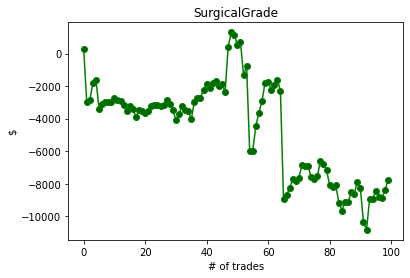

Nickname: SurgicalGrade
UID: 07B1DFF9FF718ECFD5A286932268DC63
STD: 2999.5259198477324
First recorded trade: 19 days ago
Average profit per trade ($): -77.80015614969997
Max Drawdown 928.4403669724771 %
[12144, 1308, -10836]


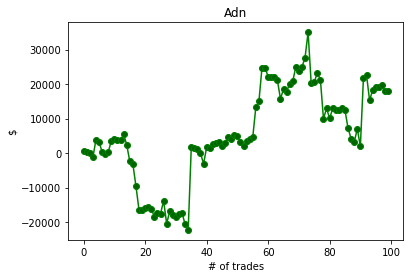

Nickname: Adn
UID: 1EA8AF542DB4134140627331AC681745
STD: 13617.739276099326
First recorded trade: 80 days ago
Average profit per trade ($): 178.99085286490018
Max Drawdown 94.4967745618542 %
[33106, 35034, 1928]


/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: G

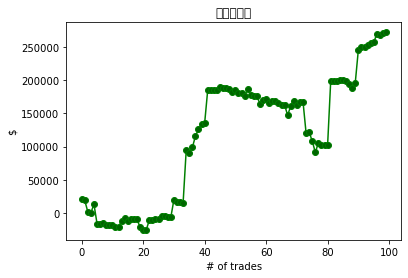

Nickname: 有一小学徒
UID: 227087068C057B808A83125C8E586BB8
STD: 95005.81253926552
First recorded trade: 15 days ago
Average profit per trade ($): 2718.6445639354997
Max Drawdown 51.89501152158588 %
[98641, 190078, 91437]


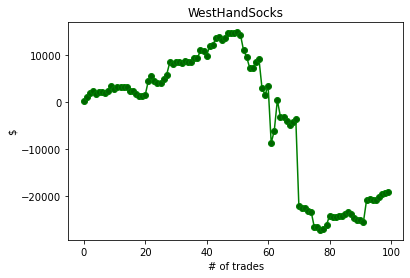

Nickname: WestHandSocks
UID: 4BE2EED9BF937BA4631E3E1BB89E40B6
STD: 14019.162642391962
First recorded trade: 53 days ago
Average profit per trade ($): -191.651251586
Max Drawdown 283.52064996614763 %
[41876, 14770, -27106]


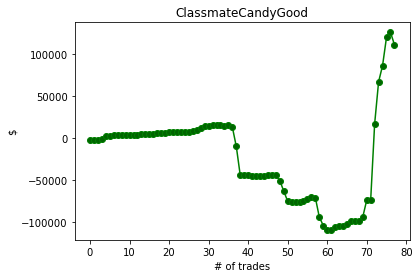

Nickname: ClassmateCandyGood
UID: 778A02597B88FF9DB4B077451A90371D
STD: 54069.98820762365
First recorded trade: 159 days ago
Average profit per trade ($): 1426.0198221529483
Max Drawdown 804.1907328969323 %
[125309, 15582, -109727]


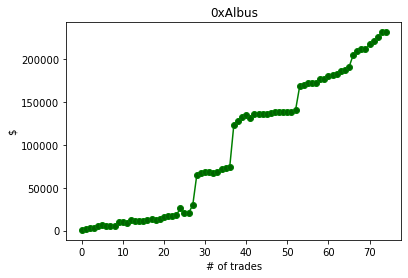

Nickname: 0xAlbus
UID: 8910121AB7B6FCA0B99DA55AD4626E3A
STD: 78407.14335916865
First recorded trade: 73 days ago
Average profit per trade ($): 3085.2072615125353
Max Drawdown 22.604006163328197 %
[5868, 25960, 20092]


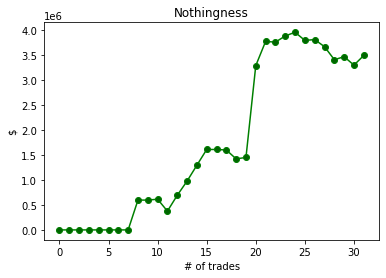

Nickname: Nothingness
UID: 8D27A8FA0C0A726CF01A7D11E0095577
STD: 1563054.014756404
First recorded trade: 143 days ago
Average profit per trade ($): 109171.2499191919
Max Drawdown 16.636516380055795 %
[658557, 3958503, 3299946]


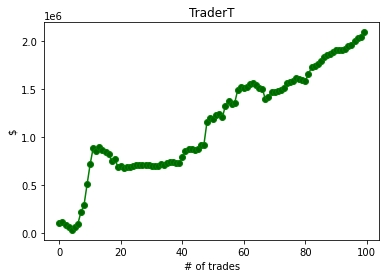

Nickname: TraderT
UID: CCF3E0CB0AAD54D9D6B4CEC5E3E741D2
STD: 549190.2971259662
First recorded trade: 8 days ago
Average profit per trade ($): 20928.0671339492
Max Drawdown 24.375087286114105 %
[218168, 895045, 676877]


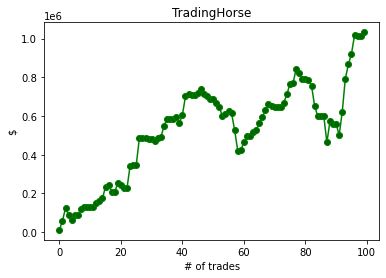

Nickname: TradingHorse
UID: D64DDD2177FA081E3F361F70C703A562
STD: 245513.444894604
First recorded trade: 106 days ago
Average profit per trade ($): 10329.966091786098
Max Drawdown 44.989353949720254 %
[379065, 842566, 463501]


/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39764 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29579 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Gly

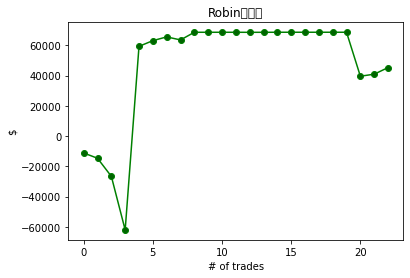

Nickname: Robin大魔王
UID: DF59C1C6151E3E906E662703FB6B4811
STD: 37697.201761617885
First recorded trade: 26 days ago
Average profit per trade ($): 1970.3158320739128
Max Drawdown -456.098216686083 %
[50896, -11159, -62055]


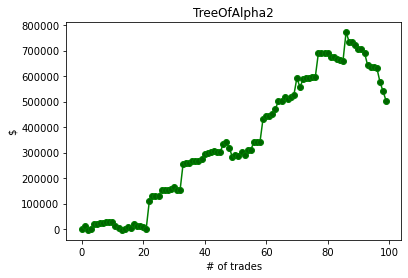

Nickname: TreeOfAlpha2
UID: DF74DFB6CB244F8033F1D66D5AA0B171
STD: 247872.51483513546
First recorded trade: 139 days ago
Average profit per trade ($): 5040.559690240598
Max Drawdown 34.696175258439865 %
[267800, 771843, 504043]


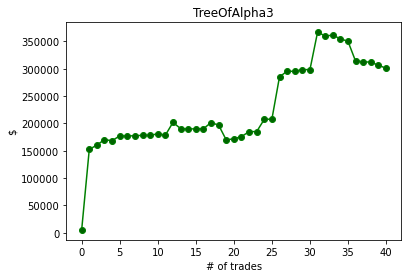

Nickname: TreeOfAlpha3
UID: E0383AD2CF88E7FA58E89556BAC51C79
STD: 78568.01330133983
First recorded trade: 160 days ago
Average profit per trade ($): 7332.091428628295
Max Drawdown 18.022263309172025 %
[66088, 366702, 300614]


/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39118 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alexandrubarsan/miniforge3/envs/miniforge_conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: G

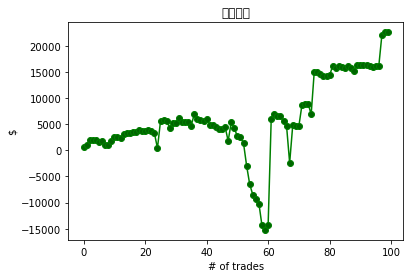

Nickname: 风火山林
UID: E78428F7155296B5599D2C0D0DC1DD2A
STD: 7536.122424662099
First recorded trade: 23 days ago
Average profit per trade ($): 226.161371436
Max Drawdown 317.4353848350707 %
[22230, 7003, -15227]


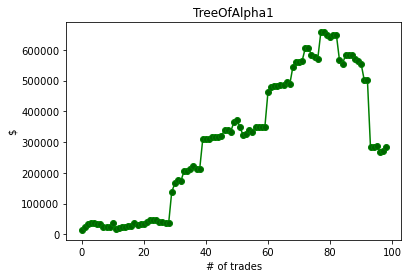

Nickname: TreeOfAlpha1
UID: FB23E1A8B7E2944FAAEC6219BBDF8243
STD: 216773.0610540002
First recorded trade: 157 days ago
Average profit per trade ($): 2878.450976235354
Max Drawdown 59.063204919740876 %
[388301, 657433, 269132]


In [13]:

def show_stats(df):
    def unique(list1):
        x = np.array(list1)
        return np.unique(x)

    uids = (df['userId'].to_list())
    for trader in unique(uids):
        nick = [k for k, v in traders.items() if v == trader][0]
        trade_no = f"Select count(userId) from df where userId = '{trader}'"
        trade_no_res = sqldf(trade_no)

        number_of_trades = len(trade_no_res)
        query = f"SELECT * from df WHERE userId = '{trader}' order by date "
        pnl = sqldf(query)
        data = pnl
        if len(data) > 0:
            lst = []
            amount = 0
            for x in data['pnl']:
                amount += int(x)
                lst.append(amount)
            peak_profit = max(lst)
            if peak_profit > 500:
                plt.plot(lst, color='green', marker='o', mfc='darkgreen')  # plot the data
                plt.ylabel('$')  # set the label for y axis
                plt.xlabel('# of trades')  # set the label for x-axis
                plt.title(nick)  # set the title of the graph
                plt.show()  # display the graph
                query = f"select createTimeStamp from df WHERE userId = '{trader}'"
                date = sqldf(query)
                first_trade_time = date['createTimeStamp'].to_list()[0]
                started = datetime.now()
                diff = str(started - datetime.fromtimestamp(first_trade_time)).split(',')[0]
                print('Nickname:', nick)
                print('UID:', trader)
                print('STD:', statistics.stdev(lst))
                print('First recorded trade:', diff, 'ago')
                print('Average profit per trade ($):', sum(data['pnl']) / len(data['pnl']))
                print('Max Drawdown', get_change(max_drawdown(lst)[2], max_drawdown(lst)[1]), '%')
                print(max_drawdown(lst))
    pass


if __name__ == '__main__':
    # fetch_data_on_trader()
    df = open_traders_df('data/my_traders.csv')
    show_stats(df)
